In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import random
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
% matplotlib inline

### Challenge 1

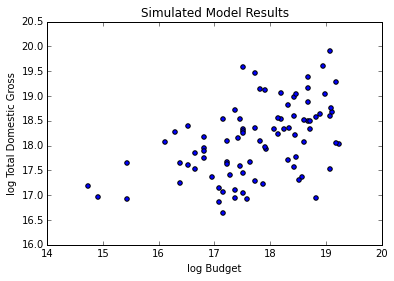

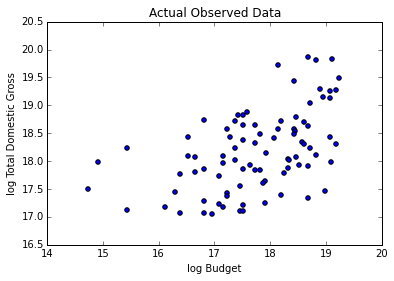

In [2]:
def simulate_outcomes(budget, sigma):
    return model.params['const'] + model.params['x1'] * budget + random.gauss(0, sigma)

df = pd.read_csv('2013_movies.csv')
df = df.dropna()

const = np.ones(len(df))
X = np.column_stack((np.log(df.Budget), const))
y = np.log(df.DomesticTotalGross)

model = sm.OLS(y,X).fit()

sigma = np.std(model.resid)
y_predict = [simulate_outcomes(np.log(df.Budget.ix[i]), sigma) for i in df.index]

plt.figure()
plt.scatter(np.log(df.Budget), y_predict)
plt.xlabel('log Budget')
plt.ylabel('log Total Domestic Gross')
plt.title('Simulated Model Results')
plt.figure()
plt.scatter(np.log(df.Budget), np.log(df.DomesticTotalGross))
plt.xlabel('log Budget')
plt.ylabel('log Total Domestic Gross')
plt.title('Actual Observed Data')

### Challenge 2

### Challenge 3

In [3]:
df_train = df[:75]
df_test = df[75:]
const = np.ones(len(df_train))
const2 = np.ones(len(df_test))

X_train = np.column_stack((const, np.log(df_train.Budget)))
y_train = np.log(df_train.DomesticTotalGross)
regr = LinearRegression()
regr.fit(X_train, y_train)
y_pred_train = regr.predict(X_train)
train_MSE = mean_squared_error(np.log(df_train.DomesticTotalGross), y_pred_train)
print 'Training MSE: {0:.2f}'.format(train_MSE)


X_test = np.column_stack((const2, np.log(df_test.Budget)))
y_pred_test = regr.predict(X_test)
test_MSE = mean_squared_error(np.log(df_test.DomesticTotalGross), y_pred_test)
print 'Test MSE: {0:.2f}'.format(test_MSE)

Training MSE: 0.32
Test MSE: 0.90


### Challenge 4

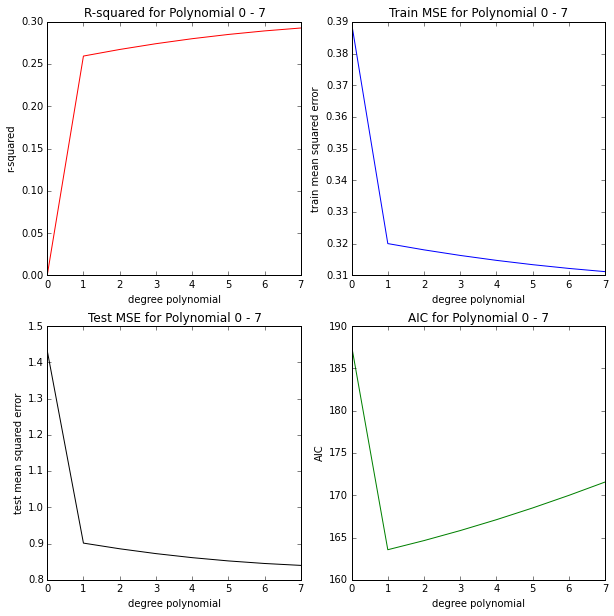

In [4]:
def calculateAIC(N, y_actual, y_predicted):
    ssr = np.sum((y_actual - y_predicted) ** 2)
    s2 = ssr / N
    return np.log((1.0 / np.sqrt(2 * np.pi * s2)) ** N * np.exp(-ssr / (s2 * 2.0)))

train_mse = []
test_mse = []
r_squared = []
aic = []

x = np.reshape(np.log(df.Budget),[87,1])
x = np.column_stack((np.ones(len(df)), x))
y = np.reshape(np.log(df.DomesticTotalGross), [87,1])

for i in range(0,8):
    regr = LinearRegression()
    regr.fit(x**i, y)  
    r_squared.append(regr.score(x**i, y))
    y_predicted = regr.predict(x ** i)
    aic.append(2 * i - 2 * calculateAIC(len(x), y, y_predicted))
    regr.fit(X_train ** i, y_train)
    y_train_pred = regr.predict(X_train ** i)
    train_mse.append(mean_squared_error(np.log(df_train.DomesticTotalGross), y_train_pred))
    y_test_pred = regr.predict(X_test ** i)
    test_mse.append(mean_squared_error(np.log(df_test.DomesticTotalGross), y_test_pred))

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(range(8), r_squared, 'r-')
plt.xlabel('degree polynomial')
plt.ylabel('r-squared')
plt.title('R-squared for Polynomial 0 - 7')
plt.subplot(2,2,2)
plt.plot(range(8), train_mse, 'b-')
plt.xlabel('degree polynomial')
plt.ylabel('train mean squared error')
plt.title('Train MSE for Polynomial 0 - 7')
plt.subplot(2,2,3)
plt.plot(range(8), test_mse, 'k-')
plt.xlabel('degree polynomial')
plt.ylabel('test mean squared error')
plt.title('Test MSE for Polynomial 0 - 7')
plt.subplot(2,2,4)
plt.plot(range(8), aic, 'g-')
plt.xlabel('degree polynomial')
plt.ylabel('AIC')
plt.title('AIC for Polynomial 0 - 7')

### Challenge 5

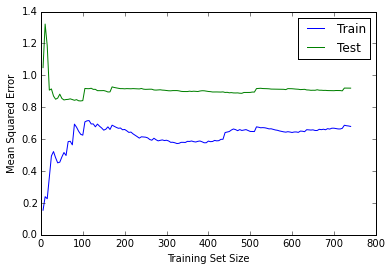

In [5]:
df2 = pd.read_csv('dataframe.csv')
df2 = df2.dropna()

mse_train = []
mse_test = []

movie_df = df2[['Domestic_Total_Gross', 'Budget']]

movie_df_train = movie_df.values[:740,:]
movie_X_train = np.column_stack((np.ones(len(movie_df_train)), np.log(movie_df_train[:,1])))
movie_y_train = np.log(movie_df_train[:,0])
movie_df_test = pd.DataFrame(movie_df.values[740:,:])

for i in range(5, len(movie_df_train) + 5, 5):
    regr = LinearRegression()
    regr.fit(movie_X_train[:i,:], movie_y_train[:i])
    y_train_pred = regr.predict(movie_X_train[:i,:])
    mse_train.append(mean_squared_error(movie_y_train[:i], y_train_pred))
    test_subset = movie_df_test.take(np.random.permutation(200))
    movie_X_test = np.column_stack((np.ones(len(test_subset)), np.log(test_subset.values[:,1])))
    y_test_pred = regr.predict(movie_X_test)
    mse_test.append(mean_squared_error(np.log(test_subset.values[:,0]), y_test_pred))

plt.plot(range(5, len(movie_df_train) + 5, 5), mse_train, label='Train')
plt.plot(range(5, len(movie_df_train) + 5, 5), mse_test, label='Test')
plt.xlabel('Training Set Size')
plt.ylabel('Mean Squared Error')
plt.legend(loc='best')